In [1]:
# Deployment: streamlit 

# Encoder-decoder le texte: unidecode.unidecode(« text »)

# topic modelling

# Latent Dirichlet Allocation ou LDA
import regex as re

import numpy as np
import pandas as pd

from unidecode import unidecode
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import en_core_web_md
nlp = en_core_web_md.load()

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stops = set(stopwords.words('english'))
import spacy
sp = spacy.load('en_core_web_sm')

spacy_stopwords = sp.Defaults.stop_words

stops = stops.union(spacy_stopwords)

stops = stops.union({' ','.',',','',"i'm",'u','rt','http','like','//t','girl','girls',"'",'"','mkr'})

def remove_stop_words(words):

   return [word.lower() for word in words if word.lower() not in stops]  

import textcleaner as tc


def remove_stop_words2(dataset):
  data = tc.document(dataset)
  new_data = data.remove_stpwrds()
 
  list_new = [word for word in new_data]

  while '' in list_new:
    list_new.remove('')
  
  return list_new


def clean_text(text):
    
  text = unidecode(text)  
    
  token_text = nlp(text)
    
  text = [element.lemma_.lower() for element in token_text]  

  clean_text = remove_stop_words(text)
    
  text = " ".join(clean_text).strip().lower()  
  
  text = re.sub(r'[0-9]+','',text).strip()  
  text = re.sub(r'@[A-Za-z0-9]+','', text).strip()
  text = re.sub(r'#','', text).strip()
#  text = re.sub(r'\x[0-9]+','',text).strip()  
  text = re.sub(r'rt[\s]+','', text).strip()
  text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>_+=-]", "", text).strip()
  text = re.sub(r'http[A-Za-z0-9]+','', text).strip()
  text = re.sub(r'bbc','',text) .strip() 
  emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  text = emoji.sub(r'', text).strip()   
  text = re.sub(r"i'm", "i am", text).strip()
  text = re.sub(r"he's", "he is", text).strip()
  text = re.sub(r"she's", "she is", text).strip()
  text = re.sub(r"that's", "that is", text).strip()        
  text = re.sub(r"what's", "what is", text).strip()
  text = re.sub(r"where's", "where is", text).strip() 
  text = re.sub(r"\'ll", " will", text).strip()  
  text = re.sub(r"\'ve", " have", text).strip()  
  text = re.sub(r"\'re", " are", text).strip()
  text = re.sub(r"\'d", " would", text).strip()
  text = re.sub(r"\'ve", " have", text).strip()
  text = re.sub(r"won't", "will not", text).strip()
  text = re.sub(r"don't", "do not", text).strip()
  text = re.sub(r"did't", "did not", text).strip()
  text = re.sub(r"can't", "can not", text).strip()
  text = re.sub(r"it's", "it is", text).strip()
  text = re.sub(r"couldn't", "could not", text).strip()
  text = re.sub(r"have't", "have not", text).strip()
  text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text).strip() 

  while "  " in text:
        text = text.replace("  "," ")
    
  text = text.lower()   
    
#  text = remove_stop_words2(text).strip()

#  text = " ".join(text).strip()
 
  return text.split(" ")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matthieu.marechal\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matthieu.marechal\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df1 = pd.read_csv('labeled_data1.csv',index_col = 0)
df2 = pd.read_csv('labeled_data2.csv',index_col = 0)
df3 = pd.read_csv('labeled_data3.csv',index_col = 0)
df4 = pd.read_csv('labeled_data4.csv',index_col = 0)

Préparation de la base de données 1

In [4]:
df1 = df1[df1['cyberbullying_type'] != 'other_cyberbullying']

labels = {'not_cyberbullying': 0 , 'age' : 1 , 'gender' : 2, 'other_cyberbullying' : 3,
       'ethnicity' : 4, 'religion' : 5}

df1['cyberbullying_type'] = df1['cyberbullying_type'].replace(labels)

In [5]:
df1['cyberbullying_type'] = df1['cyberbullying_type'].apply(lambda x : 0 if x == 0 else 1)

df1 = df1.sample(frac = 1)

df1['cyberbullying_type'].value_counts()

1    31924
0     7945
Name: cyberbullying_type, dtype: int64

In [6]:
df1.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [7]:
df1 = df1.rename(columns = {'tweet_text' : 'text' , 'cyberbullying_type' : 'label'})

df1.index = range(len(df1))

df1['db'] = 'db1'

df1 = df1.sample(frac = 1)

df1.head()

,text,label,db
13330,@DBAB_Holloway: Check out our 12th man. #Cowbo...,1,db1
11109,"Mate..can u please explain me , what is Jihad?...",1,db1
10940,@channelbianca Hope you feel better soon!,0,db1
4806,The amount of kind words and support we've rec...,0,db1
30163,@lakimcardasian who you think you are when you...,1,db1


In [8]:
df1.label.value_counts()

1    31924
0     7945
Name: label, dtype: int64

In [9]:
df1['text'].apply(lambda x : 'https' in x).sum()

730

In [10]:
df1['token_text'] = df1['text'].apply(clean_text)

In [11]:
df1.head()

,text,label,db,token_text
13330,@DBAB_Holloway: Check out our 12th man. #Cowbo...,1,db1,"[holloway, check, th, man, cowboysnation, fagg..."
11109,"Mate..can u please explain me , what is Jihad?...",1,db1,"[mate, explain, jihad, n, terrorist, use, lite..."
10940,@channelbianca Hope you feel better soon!,0,db1,"[hope, feel, soon]"
4806,The amount of kind words and support we've rec...,0,db1,"[kind, word, supporeceive, immense, thank]"
30163,@lakimcardasian who you think you are when you...,1,db1,"[think, defend, rocky, break, stuff, nigger, r..."


In [12]:
df1["token_text"].apply(lambda x : len(x) == 0).sum()

0

In [13]:
df1 = df1[df1["token_text"].apply(lambda x : len(x) > 0)]

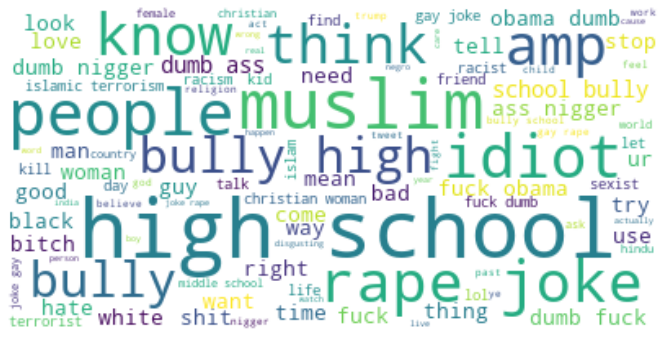

In [14]:
text = " ".join(review for review in df1[df1['label'] == 1]["token_text"].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

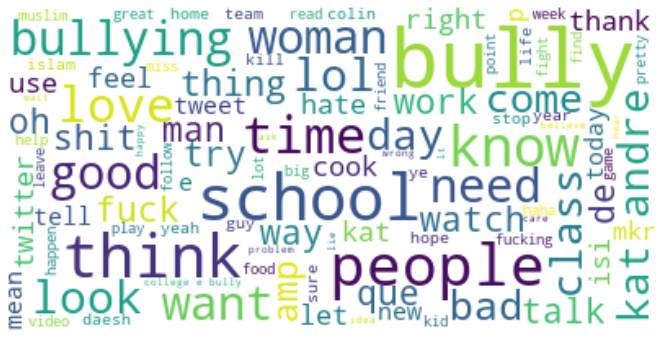

In [15]:
text = " ".join(review for review in df1[df1['label'] == 0]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
list_words_df1_label1 = []

for words in df1[df1['label'] == 1]['token_text'].tolist():
    list_words_df1_label1 += words

list_words_df1_label0 = []

for words in df1[df1['label'] == 0]['token_text'].tolist():
    list_words_df1_label0 += words

In [17]:
pd.DataFrame({'words':list_words_df1_label1}).value_counts().sort_values(ascending = False)[:10]

words 
bully     8941
school    8811
fuck      6036
nigger    5629
joke      5416
dumb      5347
high      5209
rape      4609
gay       4443
people    4188
dtype: int64

In [18]:
pd.DataFrame({'words':list_words_df1_label0}).value_counts().sort_values(ascending = False)[:10]

words   
bully       874
school      373
bullying    341
kat         295
e           293
think       284
people      274
amp         258
know        251
good        233
dtype: int64

In [19]:
drop_df1 = {'amp','…',''}

In [20]:
df1["token_text"] = df1["token_text"].apply(lambda x : [elt for elt in x if elt.strip() not in drop_df1])

In [21]:
list_words_df1_label1 = []

for words in df1[df1['label'] == 1]['token_text'].tolist():
    list_words_df1_label1 += words

list_words_df1_label0 = []

for words in df1[df1['label'] == 0]['token_text'].tolist():
    list_words_df1_label0 += words

In [22]:
pd.DataFrame({'words':list_words_df1_label1}).value_counts().sort_values(ascending = False)[:10]

words 
bully     8941
school    8811
fuck      6036
nigger    5629
joke      5416
dumb      5347
high      5209
rape      4609
gay       4443
people    4188
dtype: int64

In [23]:
pd.DataFrame({'words':list_words_df1_label0}).value_counts().sort_values(ascending = False)[:10]

words   
bully       874
school      373
bullying    341
kat         295
e           293
think       284
people      274
know        251
good        233
time        225
dtype: int64

Préparation de la base de données 2

In [24]:
df2['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [25]:
df2['label'] = df2['class'].apply(lambda x : x<2).astype(int)

df2 = df2.sample(frac = 1)

df2

,count,hate_speech,offensive_language,neither,class,tweet,label
22549,3,0,3,0,1,This is why @chrisbrown is a dumb ass hoe http...,1
14501,3,0,0,3,2,RT @AlxJames10: I mean sometimes eating a cart...,0
144,3,0,3,0,1,"""@HornyFacts: Being single isn't an excuse to ...",1
17014,3,0,3,0,1,RT @NewLegendaryEra: Twitter gives bitches unr...,1
18007,3,0,3,0,1,RT @ThatBoyACE71: Vonte not tweeting like a bi...,1
...,...,...,...,...,...,...,...
16469,3,0,3,0,1,RT @L1LDebbie: I'm your bitch down for whatever,1
195,3,0,3,0,1,"""@MikelaHenry: but what if he actually does ch...",1
20375,3,0,3,0,1,RT @rockiefresh: If ya chick always getting in...,1
132,3,0,3,0,1,"""@GirlThatsVonte: Yall still going trick or tr...",1


In [26]:
df2 = df2.iloc[:,-2:]

df2['db'] = 'db2'

df2.head()

,tweet,label,db
22549,This is why @chrisbrown is a dumb ass hoe http...,1,db2
14501,RT @AlxJames10: I mean sometimes eating a cart...,0,db2
144,"""@HornyFacts: Being single isn't an excuse to ...",1,db2
17014,RT @NewLegendaryEra: Twitter gives bitches unr...,1,db2
18007,RT @ThatBoyACE71: Vonte not tweeting like a bi...,1,db2


In [27]:
df2 = df2.rename(columns = {'tweet':'text'})

In [28]:
df2["token_text"] = df2["text"].apply(clean_text)

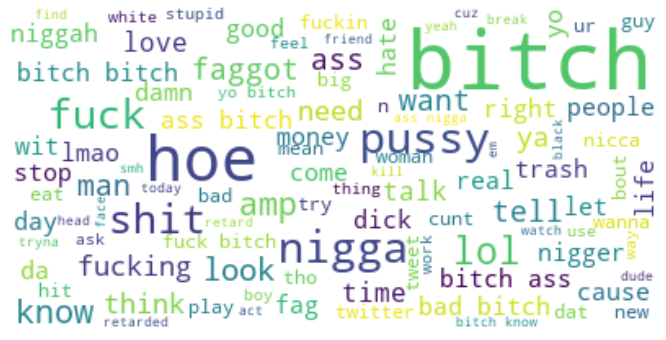

In [29]:
text = " ".join(review for review in df2[df2['label'] == 1]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

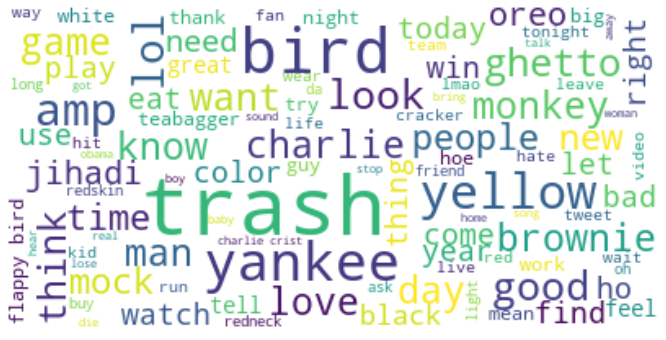

In [30]:
text = " ".join(review for review in df2[df2['label'] == 0]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
list_words_df2_label1 = []

for words in df2[df2['label'] == 1]['token_text'].tolist():
    list_words_df2_label1 += words

list_words_df2_label0 = []

for words in df2[df2['label'] == 0]['token_text'].tolist():
    list_words_df2_label0 += words

In [32]:
pd.DataFrame({'words':list_words_df2_label1}).value_counts().sort_values(ascending = False)[:10]

words 
bitch     11333
hoe        4228
pussy      2230
fuck       1699
ass        1570
shit       1300
nigga      1239
lol         939
know        839
niggas      775
dtype: int64

In [33]:
pd.DataFrame({'words':list_words_df2_label0}).value_counts().sort_values(ascending = False)[:10]

words  
trash      693
bird       471
charlie    256
\n         240
yellow     221
yankees    173
amp        166
lol        145
good       135
look       130
dtype: int64

In [34]:
drop_df2 = drop_df1.union({'\n','lol','8220'})

In [35]:
df2['token_text'] = df2['token_text'].apply(lambda x : [elt for elt in x if elt.strip() not in drop_df2])

In [36]:
list_words_df2_label1 = []

for words in df2[df2['label'] == 1]['token_text'].tolist():
    list_words_df2_label1 += words

list_words_df2_label0 = []

for words in df2[df2['label'] == 0]['token_text'].tolist():
    list_words_df2_label0 += words

In [37]:
pd.DataFrame({'words':list_words_df2_label1}).value_counts().sort_values(ascending = False)[:10]

words 
bitch     11333
hoe        4228
pussy      2230
fuck       1699
ass        1570
shit       1300
nigga      1239
know        839
niggas      775
love        664
dtype: int64

In [38]:
pd.DataFrame({'words':list_words_df2_label0}).value_counts().sort_values(ascending = False)[:10]

words  
trash      693
bird       471
charlie    256
yellow     221
yankees    173
good       135
look       130
ghetto     118
brownie    117
man        116
dtype: int64

Préparation de la base de données 3

In [39]:
df3['label'] = (df3.iloc[:,-6:].sum(axis = 1) > 0).astype(int)

df3 = df3.sample(frac = 1)

In [40]:
df3 = df3.rename(columns = {'comment_text':'text'})

df3 = df3[['text','label']]

df3['db'] = 'db3'

df3.head()

,text,label,db
71699,"""\n\nThe Tea Leaf - Issue Four\n\nHi! Welcome ...",0,db3
90507,Six Day War \n\nThese acts are aggression. Why...,0,db3
78642,Nostradamus astrology real science \n\n Michel...,0,db3
79603,"""\nNot sure. You'd have dig further into what ...",0,db3
66159,I can't really answer this question it depend...,0,db3


In [41]:
df3.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [76]:
df3["token_text"] = df3["text"].apply(clean_text)

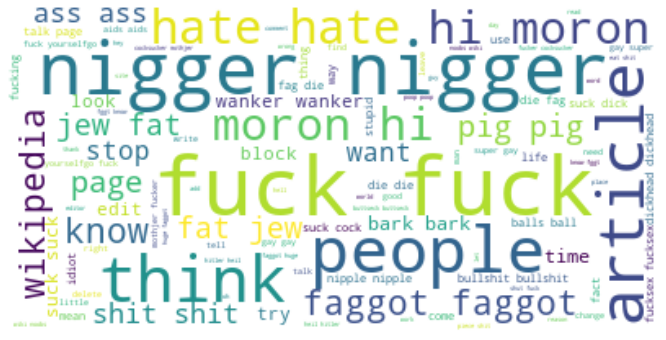

In [77]:
text = " ".join(review for review in df3[df3['label'] == 1]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

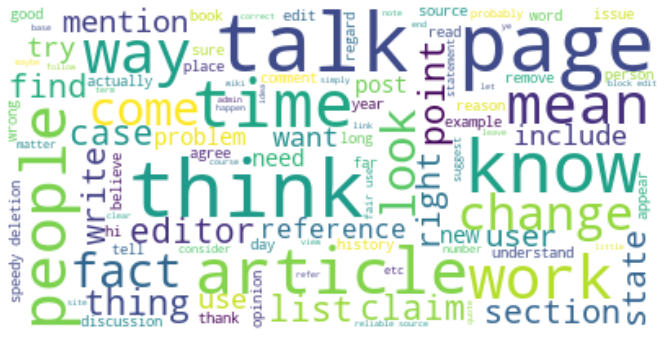

In [78]:
text = " ".join(review for review in df3[df3['label'] == 0]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
list_words_df3_label1 = []

for words in df3[df3['label'] == 1]['token_text'].tolist():
    list_words_df3_label1 += words

list_words_df3_label0 = []

for words in df3[df3['label'] == 0]['token_text'].tolist():
    list_words_df3_label0 += words

In [80]:
pd.DataFrame({'words':list_words_df3_label1}).value_counts().sort_values(ascending = False)[:10]

words    
\n           11077
\n\n         10805
fuck          9047
suck          4424
shit          3720
wikipedia     3629
nigger        3427
fucking       3115
page          2828
hate          2769
dtype: int64

In [81]:
pd.DataFrame({'words':list_words_df3_label0}).value_counts().sort_values(ascending = False)[:10]

words    
\n\n         94879
\n           86265
article      70472
page         53746
wikipedia    41137
talk         36643
edit         33549
use          31730
think        22948
thank        22791
dtype: int64

In [82]:
drop_df3 = drop_df2.union({'\n\n','\n'})

In [83]:
df3['token_text'] = df3['token_text'].apply(lambda x : [elt for elt in x if elt.strip() not in drop_df3])

In [84]:
list_words_df3_label1 = []

for words in df3[df3['label'] == 1]['token_text'].tolist():
    list_words_df3_label1 += words

list_words_df3_label0 = []

for words in df3[df3['label'] == 0]['token_text'].tolist():
    list_words_df3_label0 += words

In [85]:
pd.DataFrame({'words':list_words_df3_label1}).value_counts().sort_values(ascending = False)[:10]

words    
fuck         9047
suck         4424
shit         3720
wikipedia    3629
nigger       3427
fucking      3115
page         2828
hate         2769
ass          2700
know         2683
dtype: int64

In [86]:
pd.DataFrame({'words':list_words_df3_label0}).value_counts().sort_values(ascending = False)[:10]

words    
article      70472
page         53746
wikipedia    41137
talk         36643
edit         33549
use          31730
think        22948
thank        22791
source       22258
know         21293
dtype: int64

Préparation base de données 4

In [87]:
df4 = df4.rename(columns = {'tweet':'text'})

df4 = df4[['text','label']]

df4['db'] = 'db4'

df4 = df4.sample(frac = 1)

In [88]:
df4.columns

Index(['text', 'label', 'db'], dtype='object')

In [89]:
df4['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [90]:
df4["text"] = df4["text"].apply(unidecode)

df4["token_text"] = df4["text"].apply(clean_text)

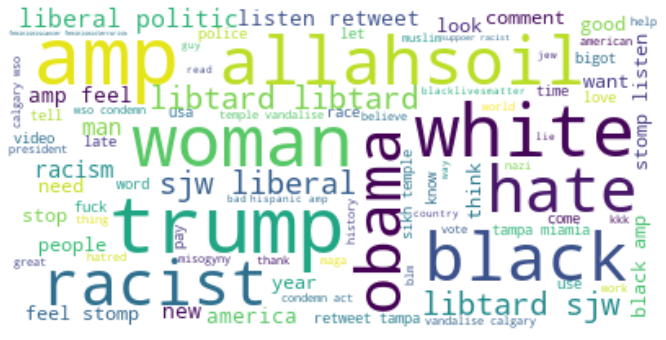

In [91]:
text = " ".join(review for review in df4[df4['label'] == 1]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

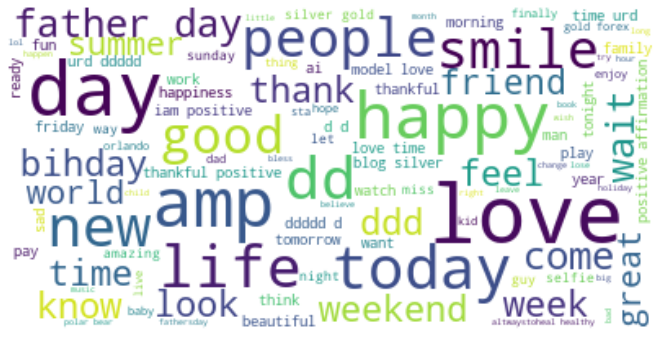

In [92]:
text = " ".join(review for review in df4[df4['label'] == 0]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [93]:
list_words_df4_label1 = []

for words in df4[df4['label'] == 1]['token_text'].tolist():
    list_words_df4_label1 += words

list_words_df4_label0 = []

for words in df4[df4['label'] == 0]['token_text'].tolist():
    list_words_df4_label0 += words

In [94]:
pd.DataFrame({'words':list_words_df4_label1}).value_counts().sort_values(ascending = False)[:10]

words    
amp          268
trump        210
a|           196
white        155
libtard      150
black        149
woman        120
racist       111
allahsoil     92
liberal       92
dtype: int64

In [95]:
pd.DataFrame({'words':list_words_df4_label0}).value_counts().sort_values(ascending = False)[:10]

words
love     2881
day      2758
happy    1744
amp      1324
good     1298
time     1201
life     1163
dd       1080
today    1053
new       931
dtype: int64

In [96]:
df4[df4['label'] == 1].iloc[245]['text']

"if you are #hispanic #black #asian a non-racist white, other minority don't serve in military while  in power #cnn #msnbc #retweet"

La quatrième base de données semble peu intéressante, on l'élimine

On joint les trois bases de données

In [97]:
df = df1

df = pd.concat([df,df2],axis = 0)

df = pd.concat([df,df3],axis = 0)

df.index = range(len(df))

In [98]:
df['db'].value_counts()

db3    159571
db1     39869
db2     24783
Name: db, dtype: int64

In [99]:
df['label'].value_counts()

0    155454
1     68769
Name: label, dtype: int64

In [100]:
value_counts_label = pd.DataFrame(df.groupby('db')['label'].value_counts())
value_counts_label.columns = ['count_label']
value_counts_label = value_counts_label.reset_index()

In [101]:
value_counts_label

,db,label,count_label
0,db1,1,31924
1,db1,0,7945
2,db2,1,20620
3,db2,0,4163
4,db3,0,143346
5,db3,1,16225


EDA sur la base de données complète

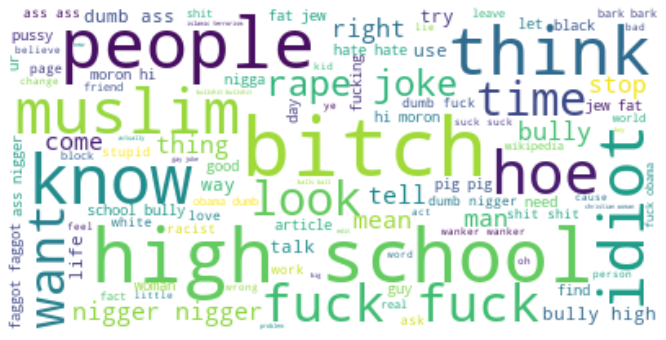

In [102]:
text = " ".join(review for review in df[df['label'] == 1]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

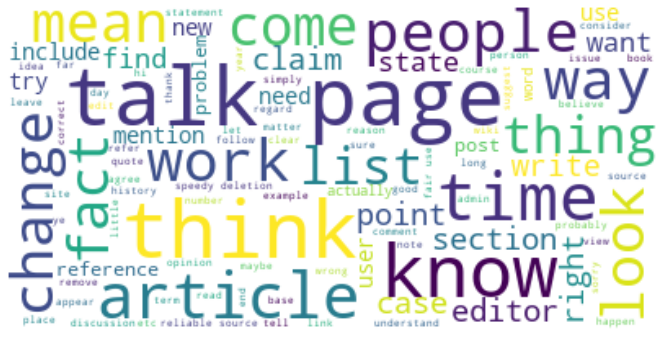

In [103]:
text = " ".join(review for review in df[df['label'] == 0]['token_text'].apply(lambda x : " ".join(x)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [104]:
df['clean_text'] = df['token_text'].apply(lambda x : " ".join(x))

In [105]:
idx = 212512

print('Label : ', df.iloc[idx]['label'])
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Original text : ',df.iloc[idx]['text'])
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Clean text : ' , df.iloc[idx]['clean_text'])

Label :  1
----------------------------------------------------------------------------------------------------------------------------
Original text :  you a bitch 

I hope you die you﻿ worthless pathetic fucking cunt.
----------------------------------------------------------------------------------------------------------------------------
Clean text :  bitch hope die worthless pathetic fucking cunt


In [106]:
list_words_df_label1 = []

for words in df[df['label'] == 1]['token_text'].tolist():
    list_words_df_label1 += words

list_words_df_label0 = []

for words in df[df['label'] == 0]['token_text'].tolist():
    list_words_df_label0 += words

In [107]:
pd.DataFrame({'words':list_words_df_label1}).value_counts().sort_values(ascending = False)[:30]

words    
fuck         16782
bitch        15419
nigger        9380
school        9142
bully         9092
ass           6901
gay           6876
people        6644
shit          6319
dumb          6046
know          5869
joke          5703
high          5509
rape          5328
fucking       4818
suck          4812
hate          4594
think         4570
hoe           4496
idiot         4045
want          3753
wikipedia     3637
right         3424
faggot        3283
black         3270
talk          3255
man           3233
woman         3222
time          3097
muslim        3089
dtype: int64

In [108]:
pd.DataFrame({'words':list_words_df_label0}).value_counts().sort_values(ascending = False)[:30]

words      
article        70502
page           53768
wikipedia      41141
talk           36838
edit           33553
use            31896
think          23341
thank          22948
source         22280
know           21654
add            18958
time           17297
people         16901
good           16195
user           15663
need           15121
link           14421
image          14145
block          13906
want           13867
delete         13751
find           13627
look           13290
work           12933
remove         12904
help           11942
list           11634
comment        11556
information    11544
deletion       11494
dtype: int64

In [109]:
df.to_csv('df.csv')

In [110]:
df.head()

,text,label,db,token_text,clean_text
0,@DBAB_Holloway: Check out our 12th man. #Cowbo...,1,db1,"[holloway, check, th, man, cowboysnation, fagg...",holloway check th man cowboysnation faggot ny ...
1,"Mate..can u please explain me , what is Jihad?...",1,db1,"[mate, explain, jihad, n, terrorist, use, lite...",mate explain jihad n terrorist use literally f...
2,@channelbianca Hope you feel better soon!,0,db1,"[hope, feel, soon]",hope feel soon
3,The amount of kind words and support we've rec...,0,db1,"[kind, word, supporeceive, immense, thank]",kind word supporeceive immense thank
4,@lakimcardasian who you think you are when you...,1,db1,"[think, defend, rocky, break, stuff, nigger, r...",think defend rocky break stuff nigger replace ...


In [ ]:
import pandas as pd

df = pd.read_csv('df.csv',index_col = 0)

In [ ]:
df.head()

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df['token_text'] = df['clean_text'].apply(lambda x : x.split(" "))
df.head()

In [ ]:
def remove_space(x):
    
    while ' ' in x:
        x = x.replace(' ','')
    return x

In [ ]:
remove_space(' fdsf fdsfds ')

In [ ]:
df['token_text'] = df['token_text'].apply(lambda x : [remove_space(elt) for elt in x])
df.head()

In [ ]:
df['clean_text'] = df['token_text'].apply(lambda x : " ".join(x))

In [ ]:
import random

db = 'db1'

idx = random.randint(0,len(df[(df['label'] == 1)&(df['db']== db)])-1)

print('Index : ', idx , ' , ' ,'Label : ', df[(df['label'] == 1)&(df['db']==db)].iloc[idx]['label'] ,' , ', 'Database : ' ,
     db)
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Original text : ',df[(df['label'] == 1)&(df['db']==db)].iloc[idx]['text'])
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Clean text : ' , df[(df['label'] == 1)&(df['db']==db)].iloc[idx]['clean_text'])

In [ ]:
import random

db = 'db1'

idx = random.randint(0,len(df[(df['label'] == 0)&(df['db']== db)])-1)

print('Index : ', idx , ' , ' ,'Label : ', df[(df['label'] == 0)&(df['db']==db)].iloc[idx]['label'] ,' , ', 'Database : ' ,
     db)
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Original text : ',df[(df['label'] == 0)&(df['db']==db)].iloc[idx]['text'])
print('---------------------------------------------------------------------------------------------\
-------------------------------')
print('Clean text : ' , df[(df['label'] == 0)&(df['db']==db)].iloc[idx]['clean_text'])

In [ ]:
random.randint(0,10)

In [68]:
df4[df4['label'] == 1].iloc[2153]['tweet']

'@user #allahsoil culture is like the horizonâ\x80\x95always in view but never in reach.  â\x80¦  â\x80¦ '